## Importar librerías necesarias.

In [1]:
import NeuralNetwork as nn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Circulos
from sklearn.datasets import make_circles

# Lunas

from sklearn.datasets import make_moons

# Para reconocimiento de imágenes
import numpy as np
import matplotlib.pyplot as plt
import NeuralNetwork
from keras.datasets import mnist
from keras.utils import np_utils

# Para replicabilidad
nn.establecer_semilla(204596)

2022-12-09 22:10:18.682646: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 22:10:18.945052: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-09 22:10:18.945104: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-09 22:10:18.979469: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-09 22:10:20.035399: W tensorflow/stream_executor/platform/de

## Funciones.

In [2]:
# Función generadora de números aleatorios.
def random_points(n = 100):
    x = np.random.uniform(0, 1, n)
    y = np.random.uniform(0, 1, n)

    return np.array([x, y]).T

def compuertas_logicas(funcion_de_activacion=nn.sigmoide, save=False, path_to_save='.', tasa_de_aprendizaje=5.0, epochs=5000):
    y_train_array = [np.array([[0], [1], [1], [0]]), np.array([[0], [0], [0], [1]]), np.array([[0], [1], [1], [1]])]
    names = ['XOR', 'AND', 'OR']
    # 
    fig, ax = plt.subplots(2, 3, figsize=(15, 5))
    #
    for i in range(3):
        red_xor = nn.crear_modelo_de_red([2,4, 1])
        dataset_n = 1000

        x_array = np.array([[0,0],[0,1],[1,0],[1,1]]) #* dataset_n
        y_array = y_train_array[i] #* dataset_n

        X = np.array(x_array)
        Y = np.array(y_array)
        #
        red_entrenada = nn.entrenar_red_neuronal(red_xor, funcion_de_activacion, nn.mean_squared_error,valor_de_prediccion=X, valor_real=Y, epochs=epochs, tasa_de_aprendizaje=tasa_de_aprendizaje)
        # 
        x_test = random_points(n = 50000)
        y_test = nn.predecir(x_test, red_entrenada, funcion_de_activacion)
        #
        ax[0, i].scatter(x_test[:,0], x_test[:,1], c = y_test, s = 20, cmap='GnBu') # GnBu
        # 
        ax[0, i].set_title(f'Compuerta lógica {names[i]}')
        ax[0, i].set_ylabel('Input A')
        
    for i in range(3):
        red_xor = nn.crear_modelo_de_red([2,4, 1])
        dataset_n = 100

        x_array = np.array([[0,0],[0,1],[1,0],[1,1]]) * dataset_n
        y_array = y_train_array[i] * dataset_n

        X = np.array(x_array)
        Y = np.array(y_array)
        #
        red_entrenada = nn.entrenar_red_con_gillespie(red_xor, funcion_de_activacion, nn.mean_squared_error,valor_de_prediccion=X, valor_real=Y, epochs=epochs, tasa_de_aprendizaje=tasa_de_aprendizaje)
        # 
        x_test = random_points(n = 10000)
        y_test = nn.predecir(x_test, red_entrenada, funcion_de_activacion)
        #
        ax[1, i].scatter(x_test[:,0], x_test[:,1], c = y_test, s = 25, cmap='GnBu') # GnBu
        ax[1, i].set_xlabel('Input B')
        
    fig.colorbar(ScalarMappable(norm=None, cmap='GnBu'), ax=ax, aspect=20, shrink=0.8)    
    ax[1, 0].set_ylabel('Input A')
    fig.suptitle('Compuertas lógicas', x=0.45)
    fig.savefig(f'./Imagenes/{path_to_save}/compuertas_logicas.png')
    
def clasificacion_de_circulos(funcion_de_activacion=None, save=False, path_to_save='.', tasa_de_aprendizaje=0.05, epochs=5000):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    # Datos de entrenamiento
    X, Y = make_circles(n_samples = 1000, noise = 0.05, factor = 0.5)
    Y = Y.reshape(len(X), 1)

    # Redes Neuronales
    red_circulos = nn.crear_modelo_de_red([2, 4, 8, 1])
    red_circulos_gillespie = nn.crear_modelo_de_red([2, 4, 8, 1])

    # Training
    red_de_circulos_entrenada = nn.entrenar_red_neuronal(red_circulos, funcion_de_activacion, nn.mean_squared_error,valor_de_prediccion=X, valor_real=Y, epochs=epochs, tasa_de_aprendizaje=tasa_de_aprendizaje)
    red_de_circulos_entrenada_gillespie = nn.entrenar_red_con_gillespie(red_circulos_gillespie, funcion_de_activacion, nn.mean_squared_error,valor_de_prediccion=X, valor_real=Y, epochs=epochs, tasa_de_aprendizaje=tasa_de_aprendizaje)

    # Testing
    y_test = nn.predecir(X, red_de_circulos_entrenada, funcion_de_activacion)
    y_test_gillespie = nn.predecir(X, red_de_circulos_entrenada_gillespie, funcion_de_activacion)

    # Plotting
    ax[0].scatter(X[:,0], X[:,1], c = y_test, cmap = 'winter', s = 25)
    ax[1].scatter(X[:,0], X[:,1], c = y_test_gillespie, cmap = 'winter', s = 25)
    fig.colorbar(ScalarMappable(norm=None, cmap='winter'), ax=ax, aspect=20, shrink=0.8)    
    fig.suptitle('Clasificación de círculos', x=0.45)
    fig.savefig(f'./Imagenes/{path_to_save}/clasificacion_circulos.png')
    
def clasificacion_de_lunas(funcion_de_activacion=None, save=False, path_to_save='.', tasa_de_aprendizaje=0.05, epochs=10000):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    # Redes Neuronales
    red_lunas = nn.crear_modelo_de_red([2, 4, 8, 1])
    red_lunas_gillespie = nn.crear_modelo_de_red([2, 4, 8, 1])

    # Datos de entrenamiento
    X, Y = make_moons(n_samples = 1000, noise = 0.05)
    Y = Y.reshape(len(X), 1)

    # Training
    red_lunas_entrenada = nn.entrenar_red_neuronal(red_lunas, funcion_de_activacion, nn.mean_squared_error,valor_de_prediccion=X, valor_real=Y, epochs=epochs, tasa_de_aprendizaje=tasa_de_aprendizaje)
    red_lunas_entrenada_gillespie = nn.entrenar_red_con_gillespie(red_lunas_gillespie, funcion_de_activacion, nn.mean_squared_error,valor_de_prediccion=X, valor_real=Y, epochs=epochs, tasa_de_aprendizaje=tasa_de_aprendizaje)

    # Testing
    y_test = nn.predecir(X, red_lunas_entrenada, funcion_de_activacion)
    y_test_gillespie = nn.predecir(X, red_lunas_entrenada_gillespie, funcion_de_activacion)

    # Plotting
    ax[0].scatter(X[:,0], X[:,1], c = y_test, cmap = 'winter', s = 25)
    ax[1].scatter(X[:,0], X[:,1], c = y_test_gillespie, cmap = 'winter', s = 25)
    fig.colorbar(ScalarMappable(norm=None, cmap='winter'), ax=ax, aspect=20, shrink=0.8)
    fig.suptitle('Clasificación de formas de luna', x=0.45)
    fig.savefig(f'./Imagenes/{path_to_save}/clasificacion_de_lunas.png')


## Experimentos con la función de activación tangente.

### Compuertas lógicas con función tangente.

100%|██████████| 50000/50000 [00:05<00:00, 8956.69it/s] 


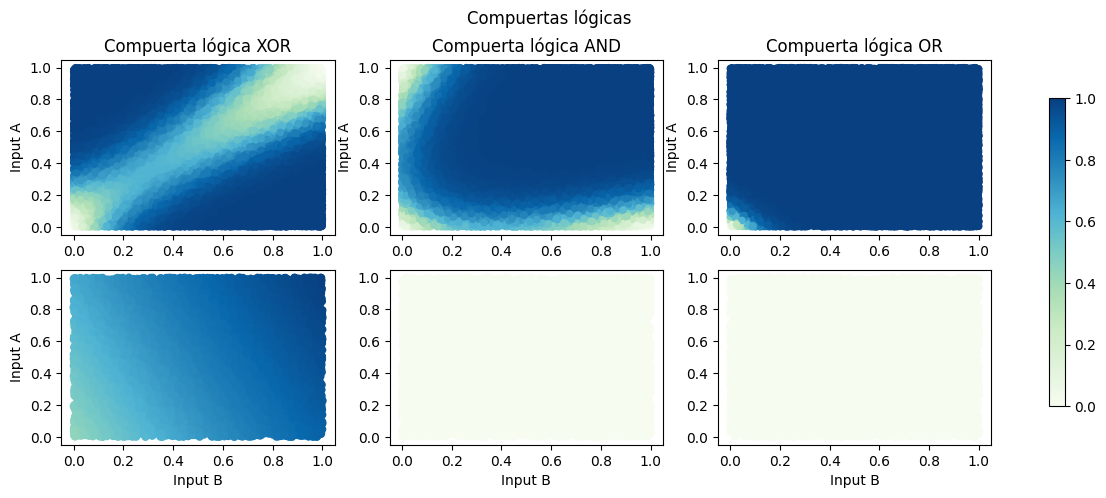

In [3]:
compuertas_logicas(funcion_de_activacion=nn.tan_h, save=False, path_to_save='Entrenamiento_f_tangente', tasa_de_aprendizaje=0.1, epochs=50000)

### Clasificación de círculos con función tangente.

 66%|██████▌   | 3304/5000 [00:01<00:00, 3017.35it/s]/mnt/c/Users/sap98/OneDrive/Escritorio/My_Stuff/programming/Uniandes/SysBio/Proyecto/StochasticPerceptron/NeuralNetwork.py:279: RuntimeWarning: invalid value encountered in divide
  cumsum_prop = np.cumsum(prop / np.sum(prop))
 72%|███████▏  | 3610/5000 [00:01<00:00, 3027.59it/s]/mnt/c/Users/sap98/OneDrive/Escritorio/My_Stuff/programming/Uniandes/SysBio/Proyecto/StochasticPerceptron/NeuralNetwork.py:273: RuntimeWarning: invalid value encountered in log
  prop = -np.log(pesos[0]) * (pesos[0] > 0.5) * 1.0
100%|██████████| 5000/5000 [00:01<00:00, 2932.26it/s]


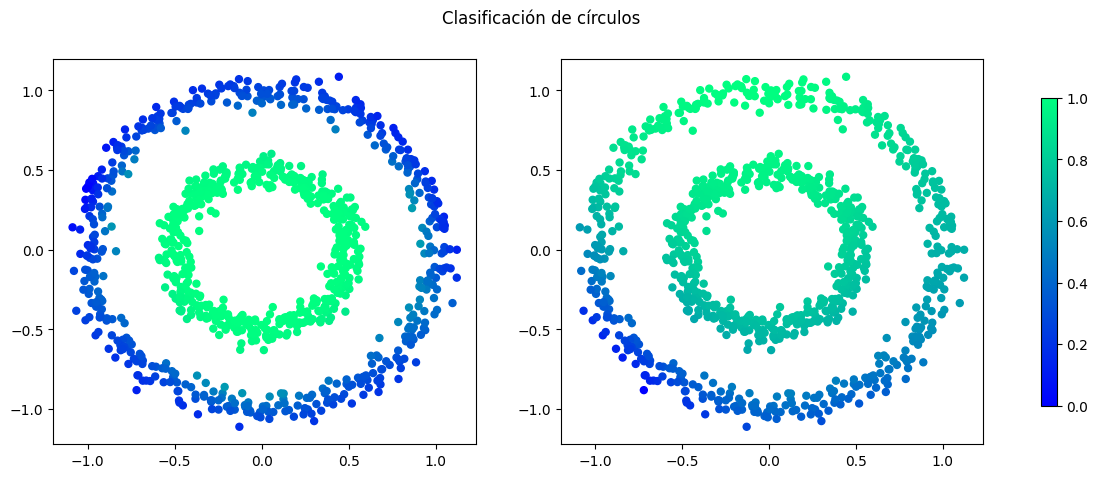

In [4]:
clasificacion_de_circulos(funcion_de_activacion=nn.tan_h, save=False, path_to_save='Entrenamiento_f_tangente', tasa_de_aprendizaje=0.0005, epochs=5000)

### Clsificacion de lunas con función tangente.

100%|██████████| 5000/5000 [00:01<00:00, 3085.20it/s]


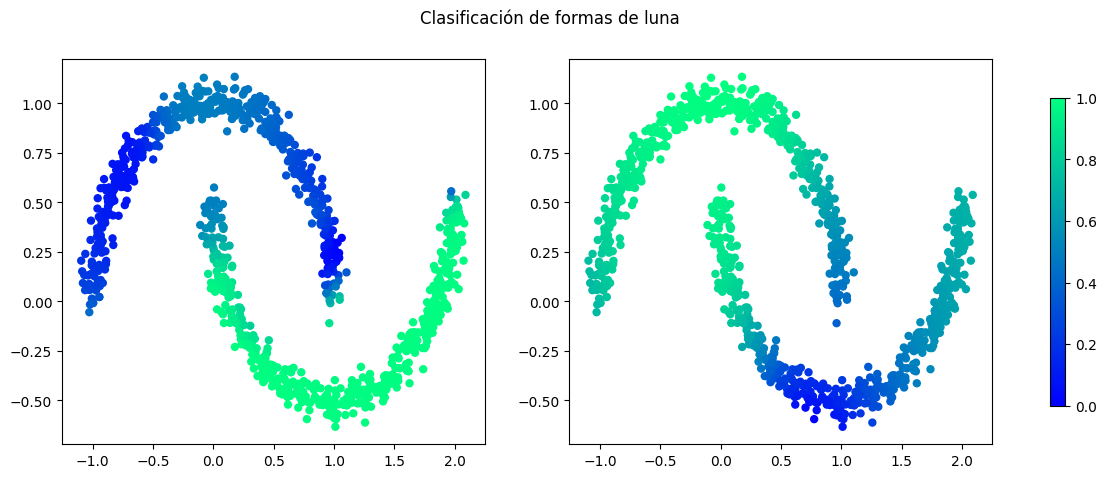

In [5]:
clasificacion_de_lunas(funcion_de_activacion=nn.tan_h, save=False, path_to_save='Entrenamiento_f_tangente', tasa_de_aprendizaje=0.0005, epochs=5000)

## Experimentos con la función de activación sigmoide.

### Compuertas lógicas con función sigmoide.

100%|██████████| 5000/5000 [00:00<00:00, 8099.00it/s]


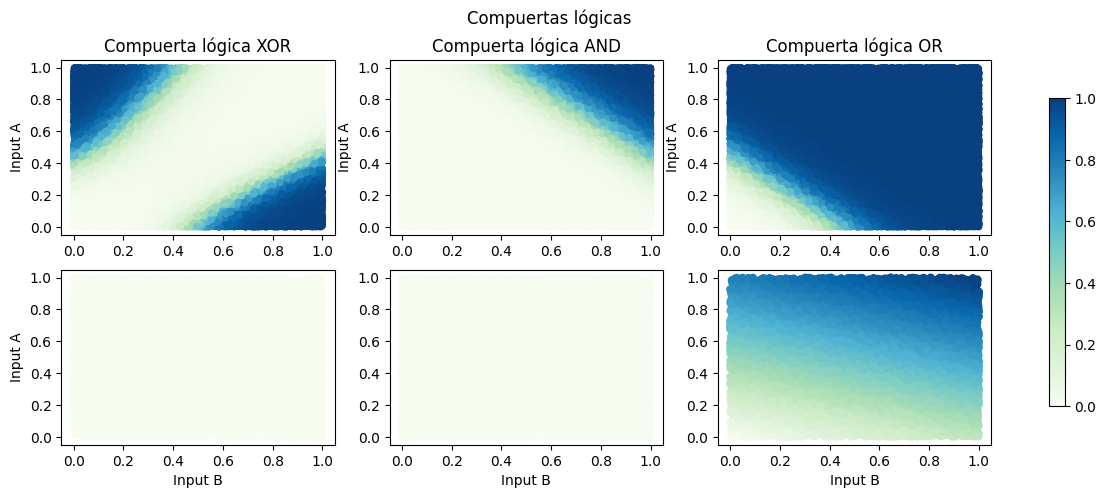

In [6]:
compuertas_logicas(funcion_de_activacion=nn.sigmoide, path_to_save='Entrenamiento_f_sigmoide')

### Clasificación de círculos con función sigmoide.

 42%|████▏     | 4161/10000 [00:01<00:01, 3163.12it/s]/mnt/c/Users/sap98/OneDrive/Escritorio/My_Stuff/programming/Uniandes/SysBio/Proyecto/StochasticPerceptron/NeuralNetwork.py:32: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x)) # Función de activación sin derivar.
100%|██████████| 10000/10000 [00:03<00:00, 3090.68it/s]


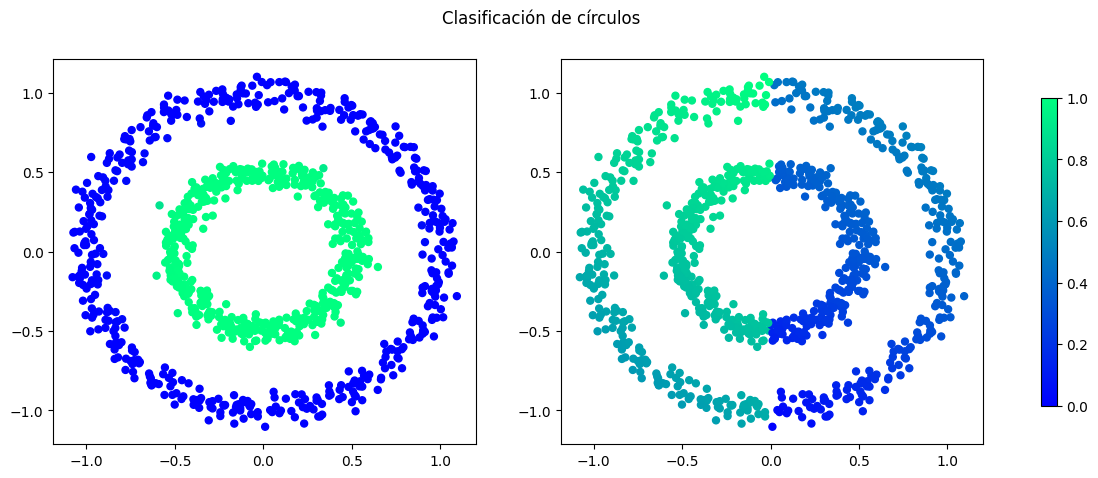

In [7]:
clasificacion_de_circulos(funcion_de_activacion=nn.sigmoide ,tasa_de_aprendizaje=0.05, epochs=10000, path_to_save='Entrenamiento_f_sigmoide')

### Clasificación de lunas con función sigmoide.

100%|██████████| 10000/10000 [00:03<00:00, 2608.97it/s]


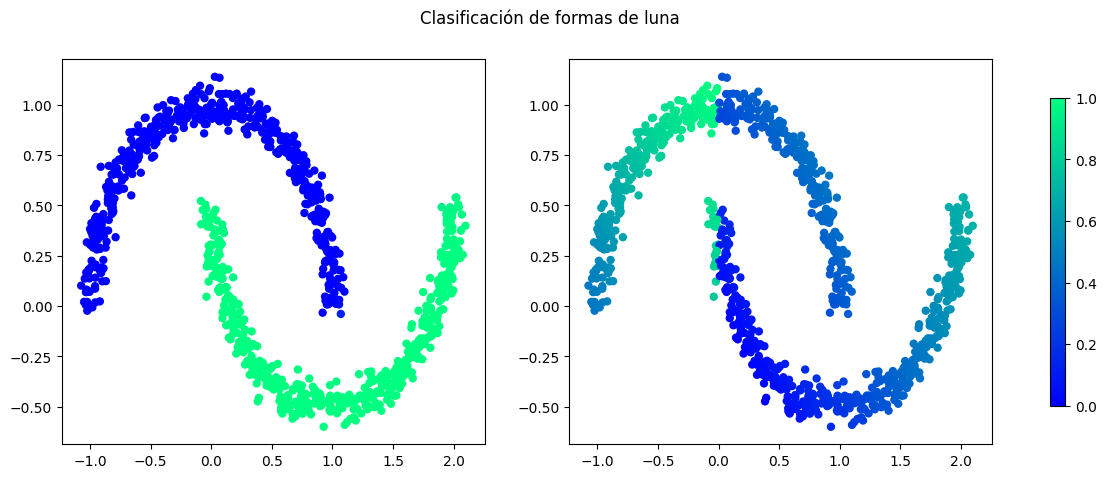

In [8]:
clasificacion_de_lunas(funcion_de_activacion=nn.sigmoide, path_to_save='Entrenamiento_f_sigmoide')

## Experimentos con función de activación Función de Hill

### Compuertas lógicas con función de hill.

100%|██████████| 50000/50000 [00:05<00:00, 8583.95it/s]


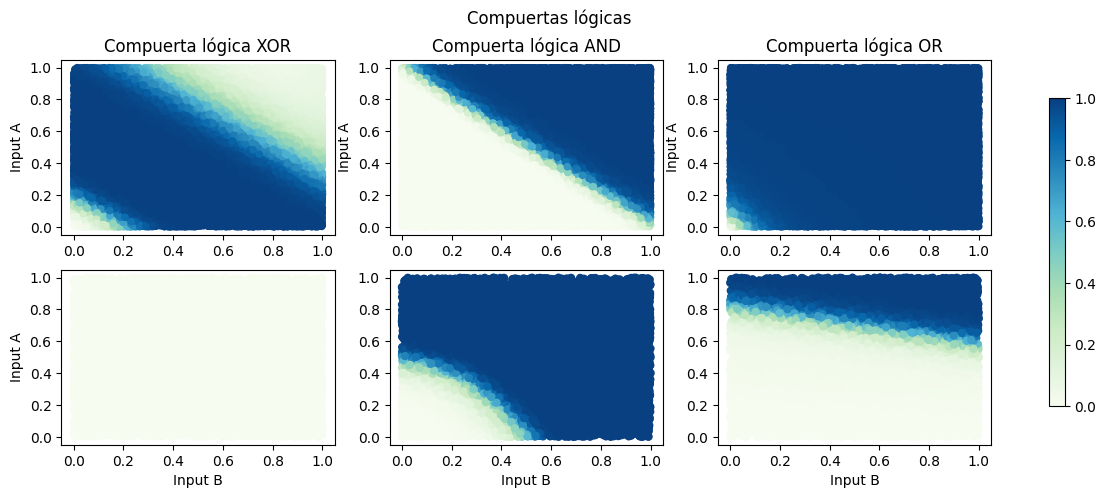

In [9]:
compuertas_logicas(funcion_de_activacion=nn.funcion_de_hill, save=False, path_to_save='Entrenamiento_f_hill', tasa_de_aprendizaje=0.009, epochs=50000)

### Clasificacion de circulos con función de hill.

100%|██████████| 5000/5000 [00:04<00:00, 1186.25it/s]


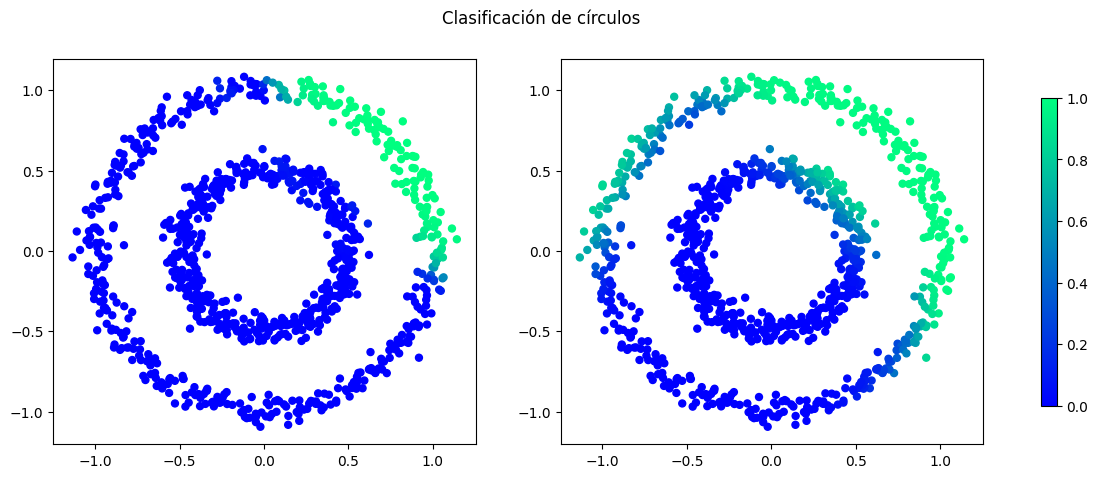

In [10]:
clasificacion_de_circulos(funcion_de_activacion=nn.funcion_de_hill, save=False, path_to_save='Entrenamiento_f_hill', tasa_de_aprendizaje=0.001, epochs=5000)

### Clasificacion de lunas con función de hill.

100%|██████████| 5000/5000 [00:04<00:00, 1188.63it/s]


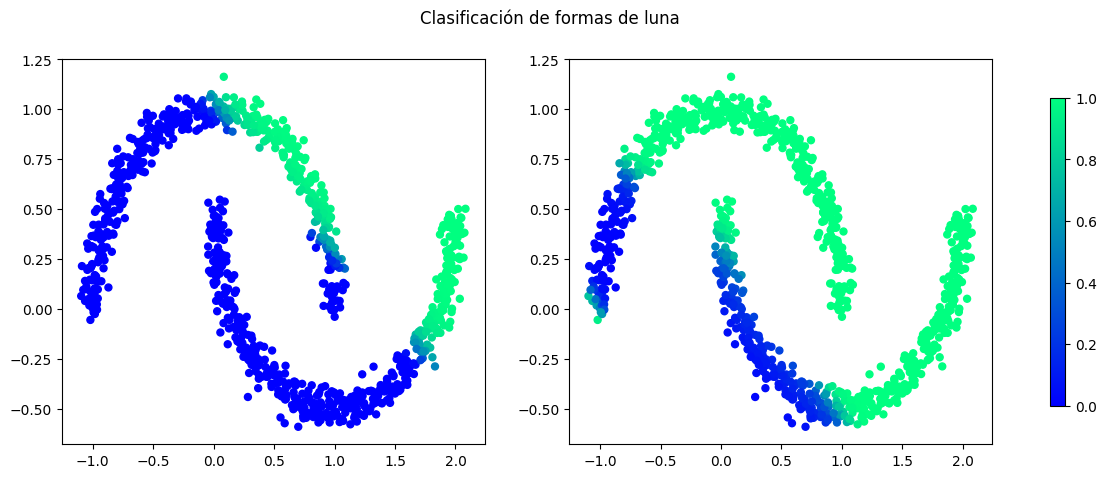

In [11]:
clasificacion_de_lunas(funcion_de_activacion=nn.funcion_de_hill, save=False, path_to_save='Entrenamiento_f_hill', tasa_de_aprendizaje=0.001, epochs=5000)

## Código por mejorar.

### Clasificacion de imágenes

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import NeuralNetwork
from keras.datasets import mnist
from keras.utils import np_utils

red_neuronal_imagenes = NeuralNetwork.crear_modelo_de_red([784, 16, 10])

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')

# normalizamos las entradas desde 0-255 a 0-1
X_train = X_train / 255
X_test = X_test / 255

# una codificacion en caliente a la salida
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_train.shape[1]

print([X_train.shape, Y_train.shape])

[(60000, 784), (60000, 10)]


In [13]:
red_imagenes_entrenada = NeuralNetwork.entrenar_red_neuronal(red_neuronal_imagenes,NeuralNetwork.sigmoide,NeuralNetwork.mean_squared_error,valor_de_prediccion=X_train, valor_real=Y_train, epochs=10, tasa_de_aprendizaje=0.05)

100%|██████████| 10/10 [00:12<00:00,  1.21s/it]


In [14]:
# X test
image_to_predict = 0
print(Y_train[image_to_predict])
# y_reslt = NeuralNetwork.predecir(X_test[3].reshape(1, 784), red_entrenada, NeuralNetwork.sigmoide)
y_reslt = NeuralNetwork.predecir(X_train[image_to_predict], red_imagenes_entrenada, NeuralNetwork.sigmoide)
print((y_reslt> 0.8)*1.0)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
